In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout, Reshape, Add, Concatenate

import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

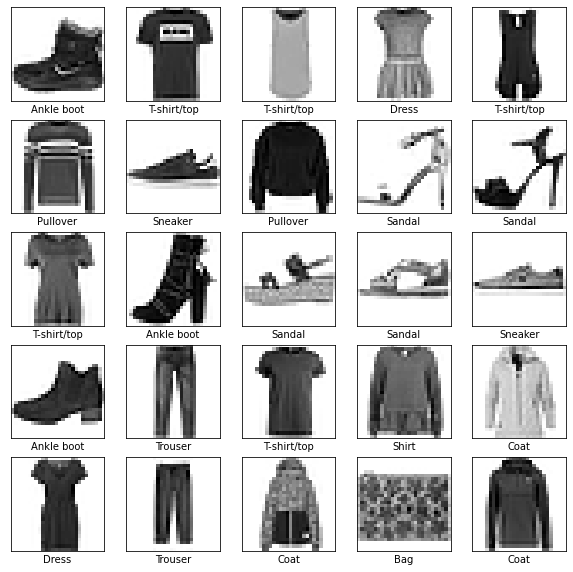

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
modelA = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelA.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
modelA.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
modelB = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

    
])

modelB.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
modelA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
modelC = tf.keras.Sequential([

    Reshape((28,28,1), input_shape=(28, 28)),
    Conv2D(32,(3,3)),
    MaxPool2D(),

    BatchNormalization(),

        Conv2D(16, (3,3)),
    MaxPool2D(),

    BatchNormalization(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10, activation='softmax')

    
])

modelC.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
modelC.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 16)         

In [14]:
history = modelA.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4920 - accuracy: 0.5593 - val_loss: 0.7130 - val_accuracy: 0.7484
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6624 - accuracy: 0.7625 - val_loss: 0.6045 - val_accuracy: 0.7802
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5768 - accuracy: 0.7920 - val_loss: 0.5622 - val_accuracy: 0.7928
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5310 - accuracy: 0.8136 - val_loss: 0.5251 - val_accuracy: 0.8092
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5014 - accuracy: 0.8216 - val_loss: 0.5071 - val_accuracy: 0.8173


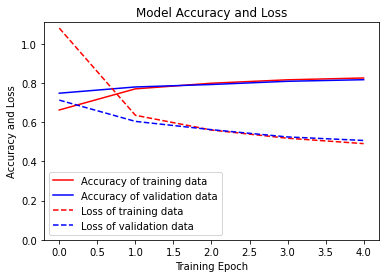

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


In [16]:
history = modelB.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1027 - accuracy: 0.6215 - val_loss: 0.5761 - val_accuracy: 0.7907
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5406 - accuracy: 0.8031 - val_loss: 0.5162 - val_accuracy: 0.8162
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4722 - accuracy: 0.8302 - val_loss: 0.4725 - val_accuracy: 0.8300
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4380 - accuracy: 0.8418 - val_loss: 0.4555 - val_accuracy: 0.8369
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4065 - accuracy: 0.8533 - val_loss: 0.4505 - val_accuracy: 0.8364


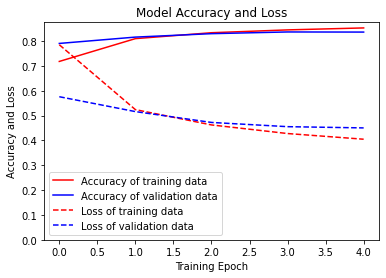

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [18]:
history = modelC.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5685 - accuracy: 0.7907 - val_loss: 23.3507 - val_accuracy: 0.1598
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3073 - accuracy: 0.8862 - val_loss: 27.9042 - val_accuracy: 0.1204
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2557 - accuracy: 0.9048 - val_loss: 24.5899 - val_accuracy: 0.1295
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2278 - accuracy: 0.9166 - val_loss: 50.6752 - val_accuracy: 0.2393
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2010 - accuracy: 0.9248 - val_loss: 77.1250 - val_accuracy: 0.1000


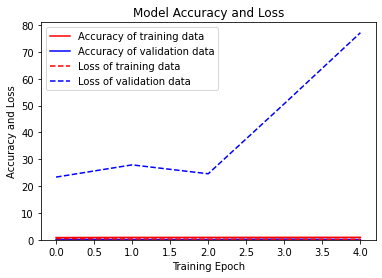

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [20]:
combine = Sequential([Input((3,10)), Dense(10, activation='softmax')])
combine.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
combine.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3, 10)             110       
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.layers import concatenate

In [25]:
model_input = Input((28,28))
x1 = modelA(model_input)
x2 = modelB(model_input)
x3 = modelC(model_input)
x = concatenate([x1,x2,x3])
output = Dense(10)(x)

In [26]:
x2.shape

TensorShape([None, 10])

In [27]:
model = Model(model_input, output, name='ensembled')

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "ensembled"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 10)           101770      input_2[0][0]                    
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 10)           235146      input_2[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 10)           57754       input_2[0][0]                    
__________________________________________________________________________________________

In [30]:
history = model.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 47s 25ms/step - loss: 1.2586 - accuracy: 0.7018 - val_loss: 1.0903 - val_accuracy: 0.5930
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.3968 - accuracy: 0.8883 - val_loss: 1.1557 - val_accuracy: 0.4424
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2967 - accuracy: 0.9071 - val_loss: 1.0797 - val_accuracy: 0.5836
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2538 - accuracy: 0.9181 - val_loss: 1.1150 - val_accuracy: 0.5982
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2282 - accuracy: 0.9249 - val_loss: 1.4117 - val_accuracy: 0.4294


In [31]:
modelA(train_images).shape

TensorShape([60000, 10])

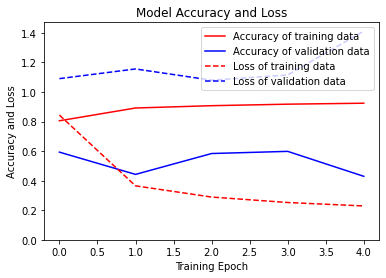

In [33]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()